## Titanic Dataset – Exploratory Data Analysis (EDA)
### 1. Dataset Loading & Overview

In [1]:
# Importing major liberaries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Load dataset
df = sns.load_dataset("titanic")

In [3]:
# First 5 records
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Dataset shape
df.shape


(891, 15)

#### Observation:
The dataset contains information about passengers such as age, gender, class, fare, and survival status.

### 2. Data Structure Understanding

In [5]:
# Column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Numerical Variables
* age
* fare
* sibsp
* parch
## Categorical Variables
* sex
* class
* embarked
* who
* deck
* embark_town
* alive

### 3. Missing Value Analysis

In [8]:
# Missing values count
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# Missing value percentage
(df.isnull().mean() * 100).sort_values(ascending=False)

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
sex             0.000000
pclass          0.000000
survived        0.000000
fare            0.000000
parch           0.000000
sibsp           0.000000
class           0.000000
adult_male      0.000000
who             0.000000
alive           0.000000
alone           0.000000
dtype: float64

#### Observation:

* deck has the highest percentage of missing values

* age also has a significant number of missing values

### 4. Survival Distribution

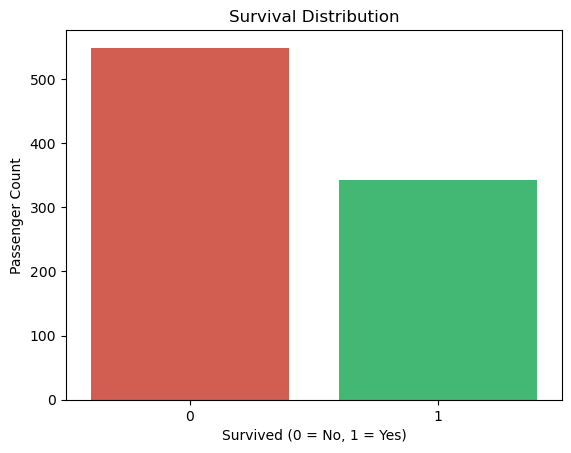

In [16]:
colors=["#E74C3C", "#2ECC71"]
sns.countplot(x="survived",hue="survived", data=df,palette=colors,legend=False)
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Passenger Count")
plt.title("Survival Distribution")
plt.show()

#### Comment:
More passengers did not survive compared to those who survived.

### 5. Gender Distribution

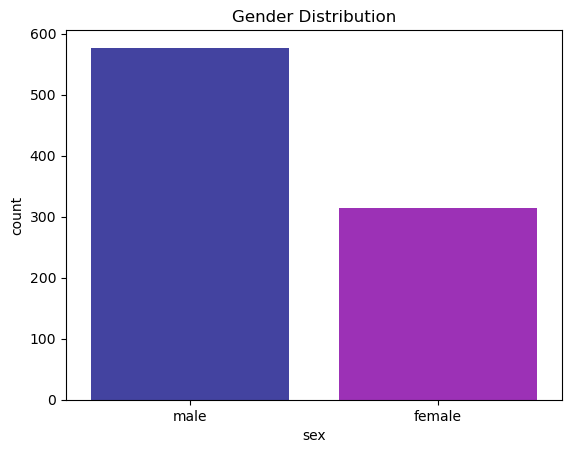

In [31]:
colors=["#3333B0","#A91BCC"]
sns.countplot(x="sex",hue="sex",data=df,palette=colors,legend=False)
plt.title("Gender Distribution")
plt.show()


#### Observation:
Male passengers were dominant onboard.

### 6. Age Distribution

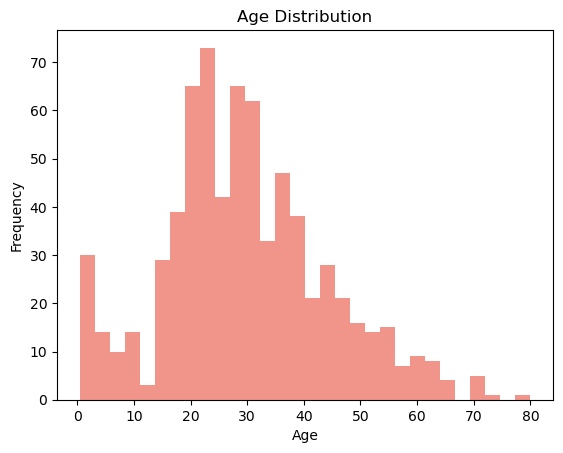

In [32]:
colors = ["#F1948A"]
plt.hist(df["age"].dropna(),color=colors, bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()


#### Observation:
Most passengers were between 20–40 years, which is the most frequent age group.

### 7. Passenger Class Distribution

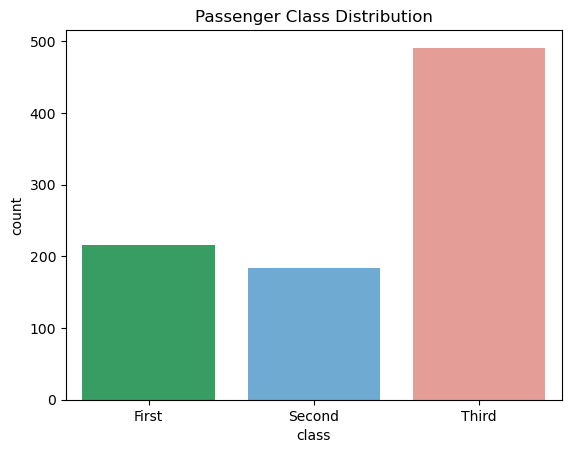

In [37]:
colors=["#27AE60","#5DADE2", "#F1948A"]
sns.countplot(x="class", data=df,palette=colors,hue="class",legend=False)
plt.title("Passenger Class Distribution")
plt.show()


#### Observation:
Third class had the maximum number of passengers.

### 8. Survival vs Gender

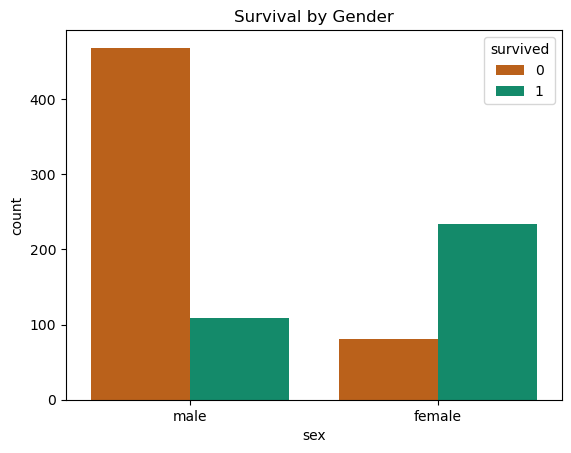

In [41]:
colors=["#D55E00", "#009E73"]
sns.countplot(x="sex", hue="survived", data=df,palette=colors)
plt.title("Survival by Gender")
plt.show()

#### Observation:
Female passengers had a much higher survival rate than males.

### 9. Survival vs Passenger Class

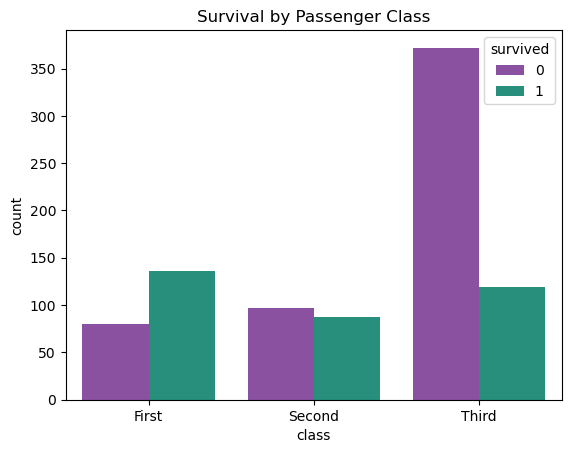

In [44]:
colors=["#8E44AD", "#16A085"]
sns.countplot(x="class", hue="survived", data=df,palette=colors)
plt.title("Survival by Passenger Class")
plt.show()

#### Observation:
First-class passengers had the best survival chances.

### 10. GroupBy Analysis – Gender

In [45]:
df.groupby("sex")["survived"].mean()


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

#### Observation:
Females had a much higher survival rate compared to males

### 11. Interactive Visualization (Plotly)

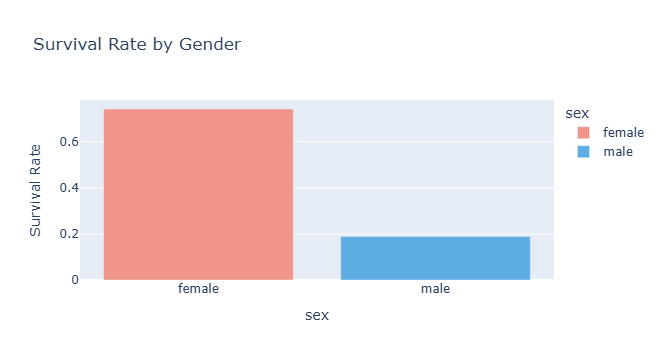

In [53]:
survival_gender = df.groupby("sex")["survived"].mean().reset_index()
fig = px.bar(data_frame=survival_gender,
    x="sex",
    y="survived",
    title="Survival Rate by Gender",
    labels={"survived": "Survival Rate"},
    color="sex",
    color_discrete_map={"male": "#5DADE2","female": "#F1948A"})
fig.show()

### 12. Business Insights
-  Gender was a major factor in survival — females had significantly higher survival rates.

- Passenger class strongly influenced survival, with first-class passengers having the best chances.

- Fare and class are correlated, indicating socio-economic status played an important role.

#### Most Influential Factor:
- Passenger class and gender were the most influential factors affecting survival.